<a href="https://colab.research.google.com/github/katoyu/image-processing-100training/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF81_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_51_60/imori.jpg
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_51_60/imori_part.jpg
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_51_60/seg.png
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_51_60/thorino.jpg

from google.colab.patches import cv2_imshow

--2019-05-28 04:07:26--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_51_60/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg’

imori.jpg           100%[===================>]  12.34K  --.-KB/s    in 0s      

2019-05-28 04:07:26 (131 MB/s) - ‘imori.jpg’ saved [12638/12638]

--2019-05-28 04:07:27--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_51_60/imori_part.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 993 [image/jpeg

#81 Hessianのコーナー検出

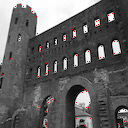

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("thorino.jpg").astype(np.float32)
H, W, C = img.shape

gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
gray = gray.astype(np.uint8)

##sobel filter
sobely = np.array(((1, 2, 1),
                           (0, 0, 0),
                           (-1, -2, -1)), dtype=np.float32)

sobelx = np.array(((1, 0, -1),
                           (2, 0, -2),
                           (1, 0, -1)), dtype=np.float32)

tmp = np.pad(gray, (1, 1), 'edge')
Ix = np.zeros_like(gray, dtype=np.float32)
Iy = np.zeros_like(gray, dtype=np.float32)

for y in range(H):
    for x in range(W):
        Ix[y, x] = np.mean(tmp[y:y+3, x:x+3] * sobelx)
        Iy[y, x] = np.mean(tmp[y:y+3, x:x+3] * sobely)
        
tmp = np.pad(Ix, (1, 1), 'edge')

Ix2 = np.zeros_like(gray, dtype=np.float32)
IxIy = np.zeros_like(gray, dtype=np.float32)

for y in range(H):
    for x in range(W):
        Ix2[y, x] = np.mean(tmp[y:y+3, x:x+3] * sobelx)
        IxIy[y, x] = np.mean(tmp[y:y+3, x:x+3] * sobely)
        
tmp = np.pad(Iy, (1, 1), 'edge')

Iy2 = np.pad(Iy, (1, 1), 'edge')

for y in range(H):
    for x in range(W):
        Iy2[y, x] = np.mean(tmp[y:y+3, x:x+3] * sobely)
        
out = np.array((gray, gray, gray))
out = np.transpose(out, (1, 2, 0))

Hes = np.zeros((H, W))

for y in range(H):
    for x in range(W):
        Hes[y, x] = Ix2[y, x] * Iy2[y, x] - IxIy[y, x]**2
        
for y in range(H):
    for x in range(W):
        if Hes[y,x] == np.max(Hes[max(y-1,0):min(y+2,H), max(x-1,0):min(x+2,W)]) and Hes[y,x] > np.max(Hes)*0.1:        out[y, x] = [0, 0, 255]
        
out = out.astype(np.uint8)
cv2_imshow(out)

#82 Harrisのコーナー検出 (Step.1) Sobel + Gauusian

###復習する


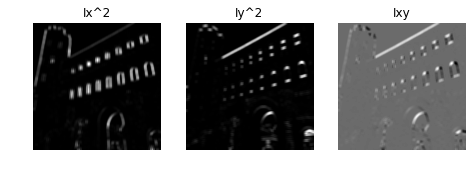

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("thorino.jpg").astype(np.float32)
H, W, C = img.shape

# gray scale
gray = 0.2126 * img[..., 2] + 0.7152* img[..., 1] +0.0722 * img[..., 0]

# Sobel
sobely = np.array(((1, 2, 1),
                   (0, 0, 0),
                   (-1, -2, -1)), dtype=np.float32)

sobelx = np.array(((1, 0, -1),
                   (2, 0, -2),
                   (1, 0, -1)), dtype=np.float32)

#Sobelフィルタの掛け合わせ

tmp = np.pad(gray, (1, 1), 'edge')

Ix = np.zeros_like(gray, dtype=np.float32)
Iy = np.zeros_like(gray, dtype=np.float32)

for y in range(H):
    for x in range(W):
        Ix[y, x] = np.sum(tmp[y:y+3, x:x+3] * sobelx)
        Iy[y, x] = np.sum(tmp[y:y+3, x:x+3] * sobely)

Ix2 = Ix ** 2
Iy2 = Iy ** 2
Ixy = Ix * Iy

## gaussian
K_size = 3
sigma = 3
###paddingを行い、その範囲を走査していく
Ix2_t = np.pad(Ix2, (K_size // 2, K_size // 2), 'edge')
Iy2_t = np.pad(Iy2, (K_size // 2, K_size // 2), 'edge')
Ixy_t = np.pad(Ixy, (K_size // 2, K_size // 2), 'edge')

####何が起きている？
K = np.zeros((K_size, K_size), dtype=np.float)
for x in range(K_size):
    for y in range(K_size):
        _x = x - K_size // 2
        _y = y - K_size // 2
        K[y, x] = np.exp( -(_x**2 + _y**2) / (2 * (sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()

for y in range(H):
    for x in range(W):
        Ix2[y,x] = np.sum(Ix2_t[y:y+K_size, x:x+K_size] * K)
        Iy2[y,x] = np.sum(Iy2_t[y:y+K_size, x:x+K_size] * K)
        Ixy[y,x] = np.sum(Ixy_t[y:y+K_size, x:x+K_size] * K)


out = np.array((gray, gray, gray))
out = np.transpose(out, (1,2,0))

plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

plt.subplot(1,3,1)
plt.imshow(Ix2, cmap='gray')
plt.title("Ix^2")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(Iy2, cmap='gray')
plt.title("Iy^2")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(Ixy, cmap='gray')
plt.title("Ixy")
plt.axis("off")

plt.savefig("out.png")
plt.show()


#83

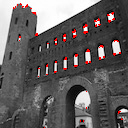

In [0]:
####続き

##select corner
k = 0.04
M = (Ix2 * Iy2 - Ixy**2) - k * ((Ix2 + Iy2)** 2)

th = 0.1
out[M >= np.max(M) * th] = [0, 0, 255]

out = out.astype(np.float32)
cv2_imshow(out)

#84 簡単な画像認識 (Step.1) 減色化 + ヒストグラム

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


[[  172 12254  2983   975   485 11576  3395   928   387 10090  4845  1062
      0]
 [ 3627  7350  4420   987  1743  8438  4651  1552   848  9089  4979  1468
      0]
 [ 1646  6547  5807  2384  1715  8502  5233   934  1553  5270  7167  2394
      0]
 [  749 10142  5465    28  1431  7922  7001    30  1492  7819  7024    49
      0]
 [  927  4197  8581  2679   669  5689  7959  2067   506  3973  6387  5518
      0]
 [ 2821  6404  2540  4619  1625  7317  3019  4423   225  8635  1591  5933
      1]
 [ 5575  7831  1619  1359  4638  6777  3553  1416  4675  7964  2176  1569
      1]
 [ 4867  7523  3275   719  4457  6390  3049  2488  4328  7135  3377  1544
      1]
 [ 7881  6160  1992   351  7426  3967  4258   733  7359  4979  3322   724
      1]
 [ 5638  6580  3916   250  5041  4185  6286   872  5226  4930  5552   676
      1]]


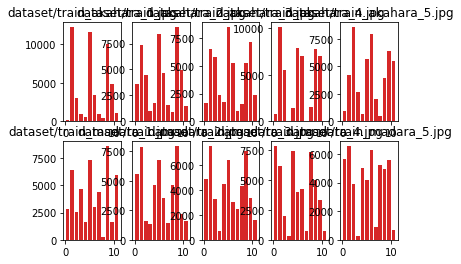

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

#decrease
def dec_color(img):
    img //= 63
    img = img*64 + 32
    return img

train = glob("dataset/train_*")
train.sort()

db = np.zeros((len(train), 13), dtype=np.int32)

for i, path in enumerate(train):
    img = dic_color(cv2.imread(path))
    ##histogram
    for j in range(4):
        db[i, j] = len(np.where(img[..., 0] == (64 * j + 32))[0]) #B
        db[i, j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0]) #G
        db[i, j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0]) #R

        ##class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1
        db[i, -1] = cls

        img_h = img.copy()//64
        img_h[..., 1] += 4
        img_h[..., 2] += 8
        plt.subplot(2, 5, i+1)
        plt.hist(img_h.ravel(), bins=12, rwidth=0.8)
        plt.title(path)
        
print(db)
plt.show()

[[  172 12254  2983   975   485 11576  3395   928   387 10090  4845  1062
      0]
 [ 3627  7350  4420   987  1743  8438  4651  1552   848  9089  4979  1468
      0]
 [ 1646  6547  5807  2384  1715  8502  5233   934  1553  5270  7167  2394
      0]
 [  749 10142  5465    28  1431  7922  7001    30  1492  7819  7024    49
      0]
 [  927  4197  8581  2679   669  5689  7959  2067   506  3973  6387  5518
      0]
 [ 2821  6404  2540  4619  1625  7317  3019  4423   225  8635  1591  5933
      1]
 [ 5575  7831  1619  1359  4638  6777  3553  1416  4675  7964  2176  1569
      1]
 [ 4867  7523  3275   719  4457  6390  3049  2488  4328  7135  3377  1544
      1]
 [ 7881  6160  1992   351  7426  3967  4258   733  7359  4979  3322   724
      1]
 [ 5638  6580  3916   250  5041  4185  6286   872  5226  4930  5552   676
      1]]


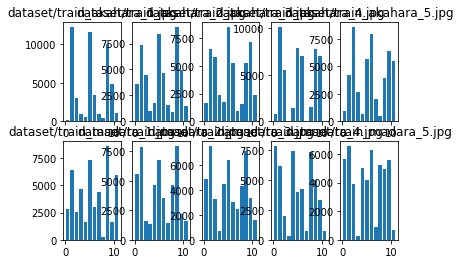

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

## Dicrease color
def dic_color(img):
    img //= 63
    img = img * 64 + 32
    return img

## Database
train = glob("dataset/train_*")
train.sort()

db = np.zeros((len(train), 13), dtype=np.int32)

for i, path in enumerate(train):
    img = dic_color(cv2.imread(path))
    ## histogram
    for j in range(4):
        db[i, j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
        db[i, j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
        db[i, j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

    ## class
    if 'akahara' in path:
        cls = 0
    elif 'madara' in path:
        cls = 1
    db[i, -1] = cls

    img_h = img.copy() // 64
    img_h[..., 1] += 4
    img_h[..., 2] += 8
    plt.subplot(2, 5, i+1)
    plt.hist(img_h.ravel(), bins=12, rwidth=0.8)
    plt.title(path)

print(db)
plt.show()
